## Practice Set – 1: Exploring pandas dataframe and starting basic operations
> **Prerequisites**: Concept of indexing and slicing operations in list and numpy (One dimensional and Multidimensional)
1. Import the necessary libraries and import the dataset. (titanic.csv)
2. See the first 15 entries.
3. See the last 10 entries.
4. What is the shape of dataset?
5. What is the number of observations in the dataset?
6. What is the number of columns in the dataset?
7. Print the name of all the columns.
8. Print only the Pclass column.
9. What are the different values in Pclass column
10. How many different Pclass are in the dataset.
11. Summarize the dataset. (using describe() function)
12. Summarize only the Age column.
13. What is the mean age of passengers?
14. See if there is any relationship between Age column and Fare column. (Use scatter plot and also
find correlation)
15. Select only the rows where age is more than 30.
16. Check if null values are present or not in the dataset. (If present display the rows)
17. Drop the column ‘Ticket’.
18. Create a new column ‘Family’ which is defined as:
    Family = SibSp + Parch

## Practice Set – 2: Linear Regression
> **Prerequisites**: Successful completion of Practice Set-1, Concepts of Linear Regression
Suppose it is 2001, and you’re working as an analyst for the Oakland Athletics of Major League Baseball
(MLB). Your primary goal is to make recommendations on how to develop the team to be able to make
the playoffs in the following season (2002).
For this problem, you will be working with the ‘baseball.csv’ data, which contains season-team level data
going back to 1962.

1. Initial Data Processing
    ▪ First subset the data to all years prior to 2002. We will build our models on this data.
    ▪ Save the 2002 season-level data for testing.
2. How many wins does it typically take to make the playoffs?
    ▪ What is the typical number of games a team should win in the regular season to expect to make the playoffs?
3. How does a team win?
    > Once we know our goal of total regular season wins (from the previous question), we need to
    determine how we can make this happen.
    At its most basic level, in baseball, a team wins when it scores more runs than its opponent. Let’s
    extrapolate this idea to the season-level.
   - Create a new column called runs_diff which is defined as:
    Run Differential = Runs Scored −Runs Allowed. diff
    (In words, the season run differential for a team is the difference between the total runs
    scored for the season and the total runs allowed (by a team’s opponents) for the
    season.)
    - Since our data is at the season level, what does is mean if the run differential is greater than
    zero?
▪ Using statsmodels and scikit-learn, create and fit a simple linear regression model (with an
intercept) using the run differential to predict the wins in a given season. Print the output
summary.
▪ What is the estimated regression model? Write it out in terms of expected wins, run
differential, and estimated coefficients. Round the intercept to the nearest integer and the
slope to the nearest tenth.
▪ Interpret the slope within this context.
▪ Suppose in one year, a team’s total run differential is 50. How many wins should that team
expect for the given season? All else equal, if this same team wanted its expected wins to
increase by 1 next season, what should it aim to increase its run differential by?
▪ Based on your estimated model and the typical number of wins needed to make the playoffs,
what run differential should Oakland aim for next season to make the playoffs?

1. How does a team get runs?
▪ Use the .corr() pandas method in python to compute the Pearson correlation between
batting average (BA), on-base percentage (OBP), slugging percentage (SLG), and runs scored
(RS).
Historically, batting average (BA) has traditionally been used for team and player evaluations.
Would you agree or disagree that this should be the primary metric to use going forward?
Why?
Create a linear regression model using on-base percentage and slugging percentage to predict
runs scored.
▪ Suppose that you expect that Oakland’s on-base percentage and slugging percentage in the
next season (2002) will be the same as in 2001. How many runs scored do you expect to see
next season?
▪ Based on the run differential goal previously and your answer to the previous question, how
many runs allowed are needed to achieve the desired run differential?

## Practice Set – 1: Exploring pandas dataframe and starting basic operations

#### 1. Import the necessary libraries and import the dataset. (titanic.csv)

In [2]:
%pip install pandas statsmodels scikit-learn numpy matplotlib seaborn

You should consider upgrading via the '/Users/admin/Desktop/MDS/ds-fundamentals/venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import os

df = pd.read_csv(os.path.join('data', 'titanic.csv'))

#### 2. See the first 15 entries.

In [4]:
df.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


#### 3. See the last 10 entries.

In [5]:
df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


#### 4. What is the shape of dataset? 

In [6]:
df.shape

(891, 12)

#### 5. What is the number of observations in the dataset?

In [7]:
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

#### 6. What is the number of columns in the dataset?

In [8]:
len(df.columns)

12

#### 7. Print the name of all the columns.

In [9]:
df.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

#### 8. Print only the Pclass column.

In [10]:
df[['Pclass']]

,Pclass
0,3
1,1
2,3
3,1
4,3
...,...
886,2
887,1
888,3
889,1


#### 9. What are the different values in Pclass column

In [11]:
df['Pclass'].value_counts() 

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

#### 10.  How many different Pclass are in the dataset.

In [12]:
df[['Pclass']].value_counts()

Pclass
3         491
1         216
2         184
Name: count, dtype: int64

#### 11.  Summarize the dataset. (using describe() function)

In [13]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### 12.  Summarize only the Age column. 

In [14]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

#### 13.  What is the mean age of passengers?

In [15]:
df['Age'].mean()

np.float64(29.69911764705882)

#### 14.  See if there is any relationship between Age column and Fare column. (Use scatter plot and also find correlation)

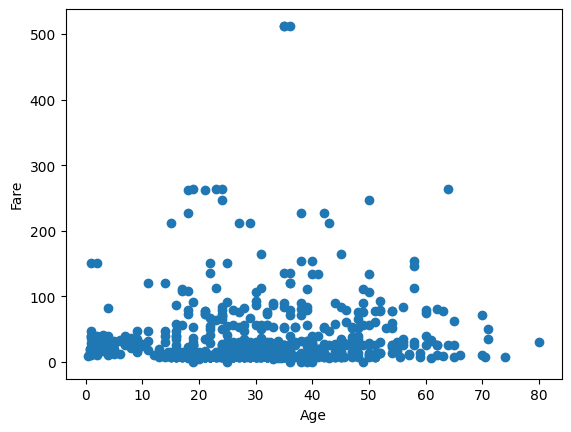

In [16]:
import matplotlib.pyplot as plt

plt.scatter(df['Age'], df['Fare'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

#### 15.  Select only the rows where age is more than 30.

In [17]:
df_age_more_than_30 = df[df['Age'] > 30]
df_age_more_than_30

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
873,874,0,3,"Vander Cruyssen, Mr. Victor",male,47.0,0,0,345765,9.0000,NaN,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q


#### 16.  Check if null values are present or not in the dataset. (If present display the rows)

In [18]:
df.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


#### 17.  Drop the column ‘Ticket’. 

In [19]:
df_without_ticket = df.drop(columns=['Ticket'])
df_without_ticket

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C148,C


#### 18.  Create a new column ‘Family’ which is defined as: 
    Family = SibSp + Parch

In [20]:
df['Family'] = df['SibSp'] + df['Parch']
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


# Practice Set – 2: Linear Regression

**Prerequisites**: Successful completion of Practice Set-1, Concepts of Linear Regression 

> Suppose it is 2001, and you’re working as an analyst for the Oakland Athletics of Major League Baseball 
(MLB). Your primary goal is to make recommendations on how to develop the team to be able to make 
the playoffs in the following season (2002).  
For this problem, you will be working with the ‘baseball.csv’ data, which contains season-team level data 
going back to 1962. 

#### 1. Initial Data Processing 
- First subset the data to all years prior to 2002.  We will build our models on this data.  
- Save the 2002 season-level data for testing. 

In [21]:
df = pd.read_csv(os.path.join('data', 'baseball.csv'))
df.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


In [22]:
df_before_2002 = df[df['Year'] < 2002]
df_before_2002['Year'].value_counts()

df_2002 = df[df['Year'] == 2002]
df_2002

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
300,ANA,AL,2002,851,644,99,0.341,0.433,0.282,1,3.0,1.0,162,0.314,0.392
301,ARI,NL,2002,819,674,98,0.346,0.423,0.267,1,4.0,4.0,162,0.305,0.397
302,ATL,NL,2002,708,565,101,0.331,0.409,0.260,1,2.0,4.0,161,0.313,0.364
303,BAL,AL,2002,667,773,67,0.309,0.403,0.246,0,NaN,NaN,162,0.336,0.435
304,BOS,AL,2002,859,665,93,0.345,0.444,0.277,0,NaN,NaN,162,0.308,0.385
305,CHC,NL,2002,706,759,67,0.321,0.413,0.246,0,NaN,NaN,162,0.331,0.407
306,CHW,AL,2002,856,798,81,0.338,0.449,0.268,0,NaN,NaN,162,0.330,0.423
307,CIN,NL,2002,709,774,78,0.330,0.408,0.253,0,NaN,NaN,162,0.338,0.426
308,CLE,AL,2002,739,837,74,0.321,0.412,0.249,0,NaN,NaN,162,0.348,0.423
309,COL,NL,2002,778,898,73,0.337,0.423,0.274,0,NaN,NaN,162,0.349,0.466


#### 2. How many wins does it typically take to make the playoffs? 
- What is the typical number of games a team should win in the regular season to expect to make the playoffs?

In [23]:
df[df['Playoffs'] == 1][['W']].mean()

W    95.118852
dtype: float64

#### 3. How does a team win? 
> Once we know our goal of total regular season wins (from the previous question), we need to 
determine how we can make this happen.  
At its most basic level, in baseball, a team wins when it scores more runs than its opponent. Let’s 
extrapolate this idea to the season-level.  
- Create a new column called runs_diff which is defined as:  
  -   Run Differential = Runs Scored −Runs Allowed. diff  
  - (In words, the season run differential for a team is the difference between the total runs scored for the season and the total runs allowed (by a team’s opponents) for the season.) 
- Since our data is at the season level, what does is mean if the run differential is greater than 
zero? 
- Using statsmodels and scikit-learn, create and fit a simple linear regression model (with an 
intercept) using the run differential to predict the wins in a given season. Print the output 
summary. 
- What is the estimated regression model? Write it out in terms of expected wins, run 
differential, and estimated coefficients. Round the intercept to the nearest integer and the 
slope to the nearest tenth.  
- Interpret the slope within this context. 
- Suppose in one year, a team’s total run differential is 50. How many wins should that team 
expect for the given season? All else equal, if this same team wanted its expected wins to 
increase by 1 next season, what should it aim to increase its run differential by? 
- Based on your estimated model and the typical number of wins needed to make the playoffs, 
what run differential should Oakland aim for next season to make the playoffs?

In [24]:
pd.options.mode.copy_on_write = True
df_before_2002['runs_diff'] = df_before_2002['RS'] - df_before_2002['RA']
df_before_2002

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,runs_diff
330,ANA,AL,2001,691,730,75,0.327,0.405,0.261,0,NaN,NaN,162,0.331,0.412,-39
331,ARI,NL,2001,818,677,92,0.341,0.442,0.267,1,5.0,1.0,162,0.311,0.404,141
332,ATL,NL,2001,729,643,88,0.324,0.412,0.260,1,7.0,3.0,162,0.314,0.384,86
333,BAL,AL,2001,687,829,63,0.319,0.380,0.248,0,NaN,NaN,162,0.337,0.439,-142
334,BOS,AL,2001,772,745,82,0.334,0.439,0.266,0,NaN,NaN,161,0.329,0.393,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,PHI,NL,1962,705,759,81,0.330,0.390,0.260,0,NaN,NaN,161,NaN,NaN,-54
1228,PIT,NL,1962,706,626,93,0.321,0.394,0.268,0,NaN,NaN,161,NaN,NaN,80
1229,SFG,NL,1962,878,690,103,0.341,0.441,0.278,1,1.0,2.0,165,NaN,NaN,188
1230,STL,NL,1962,774,664,84,0.335,0.394,0.271,0,NaN,NaN,163,NaN,NaN,110


In [25]:
df_before_2002.isna().sum()

Team              0
League            0
Year              0
RS                0
RA                0
W                 0
OBP               0
SLG               0
BA                0
Playoffs          0
RankSeason      748
RankPlayoffs    748
G                 0
OOBP            812
OSLG            812
runs_diff         0
dtype: int64

In [26]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np

dat = sm.datasets.get_rdataset("Guerry", "HistData").data
results = smf.ols('Lottery ~ Literacy + np.log(Pop1831)', data=dat).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Lottery   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     22.20
Date:                Fri, 21 Feb 2025   Prob (F-statistic):           1.90e-08
Time:                        06:42:25   Log-Likelihood:                -379.82
No. Observations:                  86   AIC:                             765.6
Df Residuals:                      83   BIC:                             773.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         246.4341     35.233      6.995      0.000     176.358     316.510
Literacy           -0.4889      0.128     -3.832      0.000      -0.743      -0.235
np.log(Pop1831)   -31.3114      5.977     -5.239      0.000     -43.199     -19.424
==============================================================================
Omnibus:                        3.713   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.156   Jarque-Bera (JB):                3.394
Skew:                          -0.487   Prob(JB):                        0.183
Kurtosis:                       3.003   Cond. No.                         702.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
df.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


In [28]:
df[df.duplicated()].index

Index([], dtype='int64')

In [29]:
# df[start:end:step]

# select first row only
df.iloc[5:10,][['Team', 'League']]

# loc vs iloc

,Team,League
5,CHW,AL
6,CIN,NL
7,CLE,AL
8,COL,NL
9,DET,AL


In [30]:
import numpy as np
x = np.array([[5,2], [4,6]])
y = x[1:]

In [39]:
df_conditional = df.drop([df['Team'] == 'CHW'].index)

KeyError: '[<built-in method index of list object at 0x163d2a580>] not found in axis'